<a href="https://colab.research.google.com/github/RaksoIngenieria/Data-Analytics/blob/main/AromasDelValle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análisis Exploratorio de Datos (EDA) - Analítica de la Cadena de Suministros
1. Importar librerias

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output


In [16]:
# Cargar Dataset
df = pd.read_csv('/content/EndInvFINAL12312016.csv')

# La funcion head() devuelve por default las primeras 5 filas, a menos que dentro del parentesis se indique lo contrario
df.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [ ]:
# La funcion tail() devuelve por default las ultimas 5 filas, a menos que dentro del parentesis se indique lo contrario
df.tail()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
79520,33_HORNSEY_41759,33,HORNSEY,41759.0,Blue Fish Pfalz Rsl,750mL,10.0,7.99,2016-12-31
79521,33_HORNSEY_41787,33,HORNSEY,41787.0,Ferrari-Carano Cab Svgn Alex,750mL,6.0,27.99,2016-12-31
79522,33_HORNSEY_41827,33,HORNSEY,41827.0,Banfi Chianti Clsc Tuscany,750mL,4.0,14.99,2016-12-31
79523,33_HORNSEY_41940,33,HORNSEY,41940.0,Lange Willamette Pnt Nr,750mL,13.0,23.99,2016-12-31
79524,33_HORNSEY_41970,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# El atributo Devuelve una tupla que representa las dimensiones de un DataFrame, indicando el número de filas y columnas
df.shape

(224489, 9)

In [ ]:
# La funcion info() proporciona un resumen del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


In [ ]:
# El atributo retorna las etiquetas de las columnas del DataFrame
df.columns

Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'endDate'],
      dtype='object')

In [ ]:
# La expresión df.isnull().sum() se utiliza para contar la cantidad de valores faltantes (nulos o NaN) en cada columna de un DataFrame.
df.isnull().sum()

,0
InventoryId,0
Store,0
City,1284
Brand,0
Description,0
Size,0
onHand,0
Price,0
endDate,0


2. Analítica descriptiva.


In [ ]:
# Generate descriptive statistics.
# El método df.describe() proporciona un resumen estadístico de las columnas numéricas de un DataFrame.
df.describe()

,Store,Brand,onHand,Price
count,224489.000000,224489.000000,224489.000000,224489.000000
mean,43.505740,14356.370513,21.763988,23.585583
std,23.326415,13118.467851,37.233576,79.202775
min,1.000000,58.000000,0.000000,0.490000
25%,23.000000,3798.000000,7.000000,9.990000
50%,44.000000,8259.000000,12.000000,14.990000
75%,66.000000,23965.000000,22.000000,23.490000
max,81.000000,90631.000000,3676.000000,13999.900000


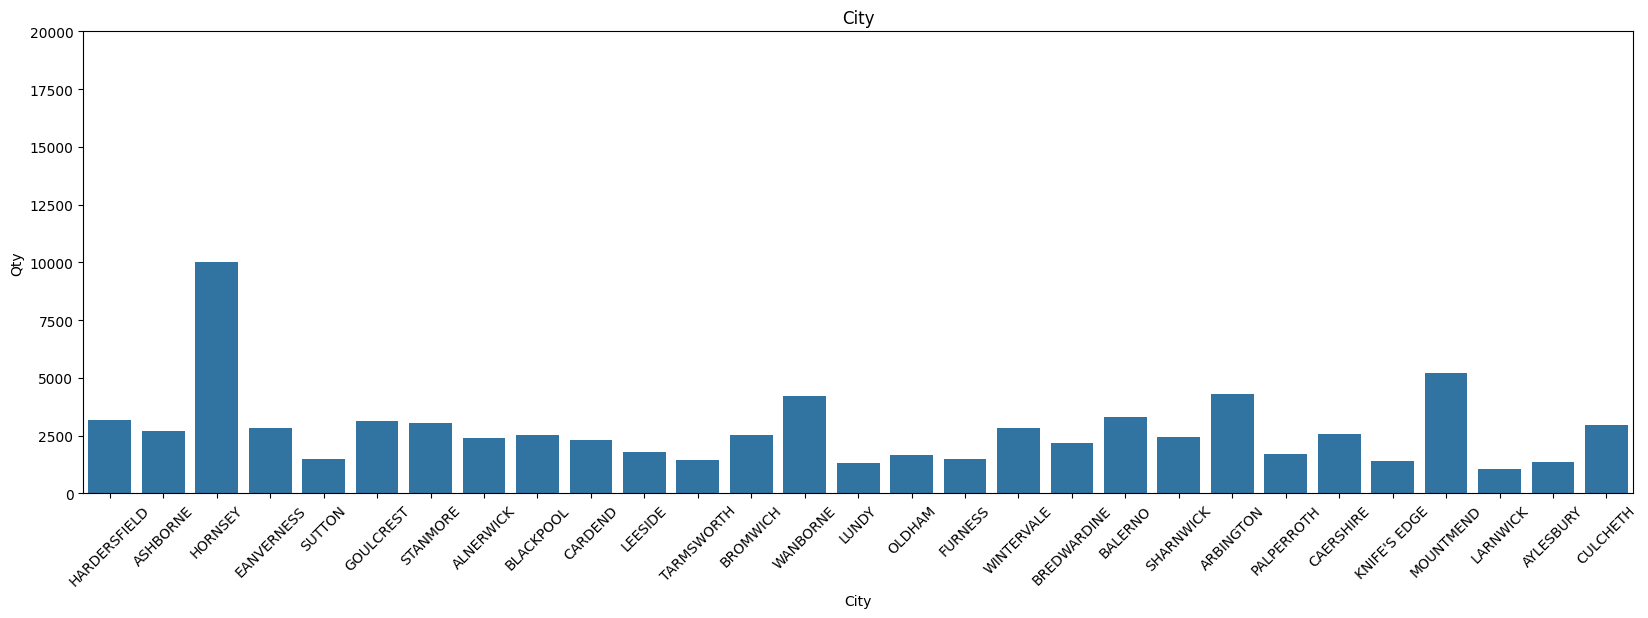

In [ ]:
# Diagrama de barras

# countplot es una función de la biblioteca Seaborn en Python
# Crea un gráfico de barras donde la altura de cada barra,
# representa el número de ocurrencias de una categoría específica en el conjunto de datos.

plt.figure(figsize=(20,6))
sns.countplot(data=df, x='City')
plt.xlabel('City')
plt.ylabel('Qty')
plt.ylim(0, 20000)  # Establecer el rango del eje y:
plt.xticks(rotation=45) # Rotar las etiquetas 45 grados
plt.title('City')
plt.show()

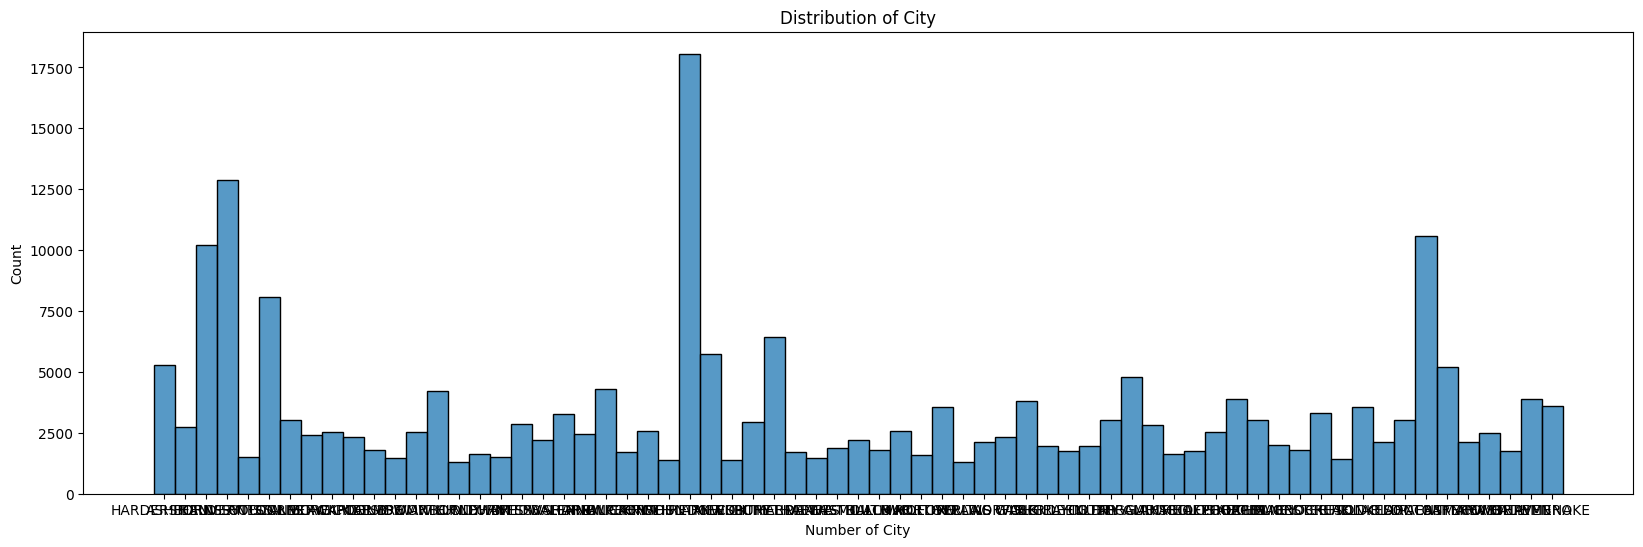

In [ ]:
# Histograma
plt.figure(figsize=(20,6))
sns.histplot(data=df, x='City', bins=20)
plt.xlabel('Number of City')
plt.ylabel('Count')
plt.title('Distribution of City')
plt.show()

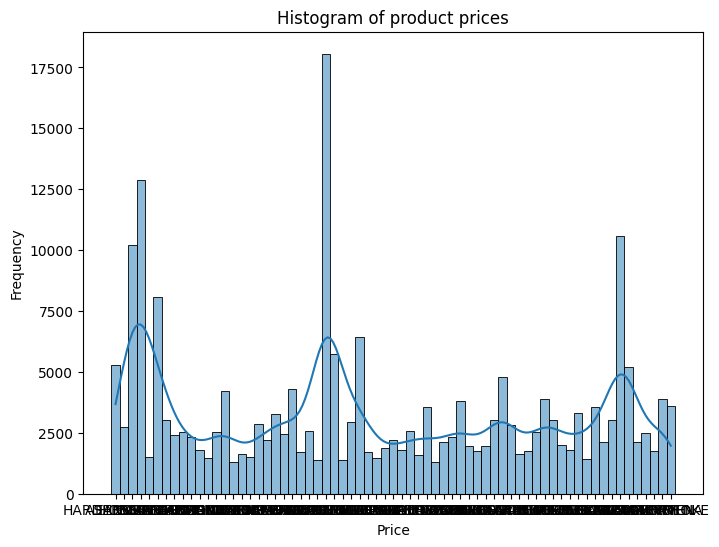

In [ ]:
#Deseamos un histograma de la distribución de los precios de los productos
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='City', kde=True, bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of product prices')
plt.show()

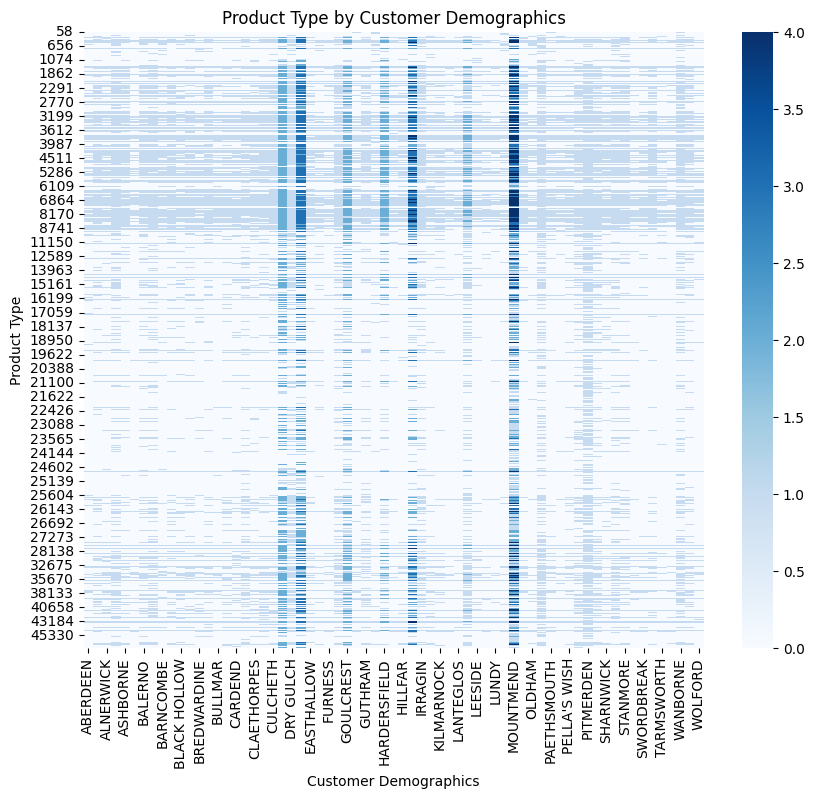

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(df['Brand'], df['City']), cmap='Blues')
plt.xlabel('Customer Demographics')
plt.ylabel('Product Type')
plt.title('Product Type by Customer Demographics')
plt.show()

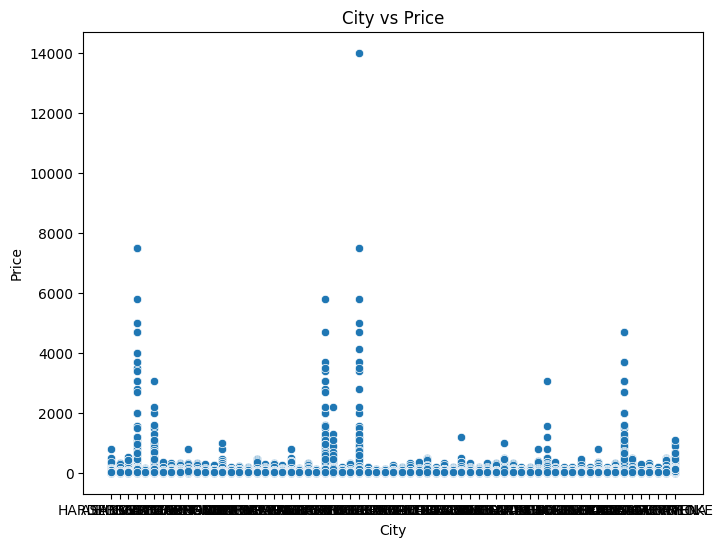

In [ ]:
#diagrama de dispersión
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='City', y='Price')
plt.xlabel('City')
plt.ylabel('Price')
plt.title('City vs Price')
plt.show()

/tmp/ipython-input-2172325585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='Blues_d')


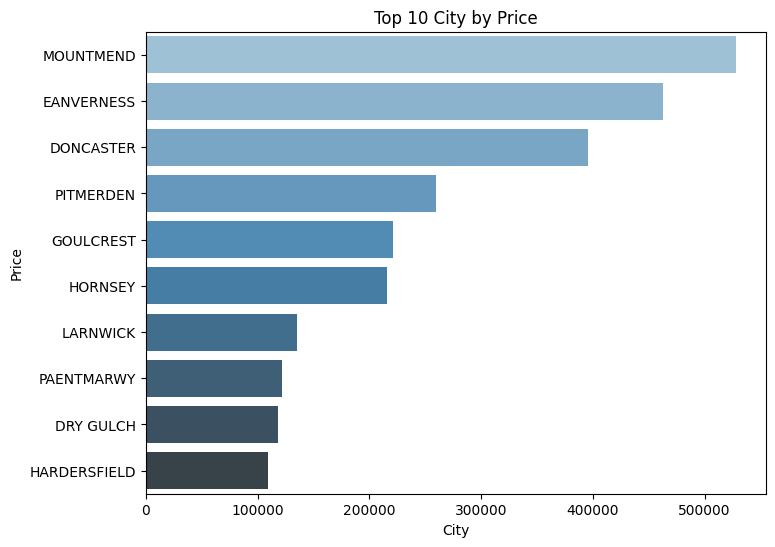

In [ ]:
plt.figure(figsize=(8,6))
top_suppliers = df.groupby('City')['Price'].sum().nlargest(10)
sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='Blues_d')
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Top 10 City by Price')
plt.show()

In [ ]:
inventario_tiendas = df.groupby('City')['onHand'].sum()
inventario_tiendas_df = inventario_tiendas.to_frame(name='onHand')
inventario_tiendas_df


,onHand
City,
ABERDEEN,43148
AETHELNEY,70911
ALNERWICK,40390
ARBINGTON,83275
ASHBORNE,56671
...,...
TARMSWORTH,27382
VERITAS,22083
WANBORNE,95827


/tmp/ipython-input-260195939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='Blues_d')


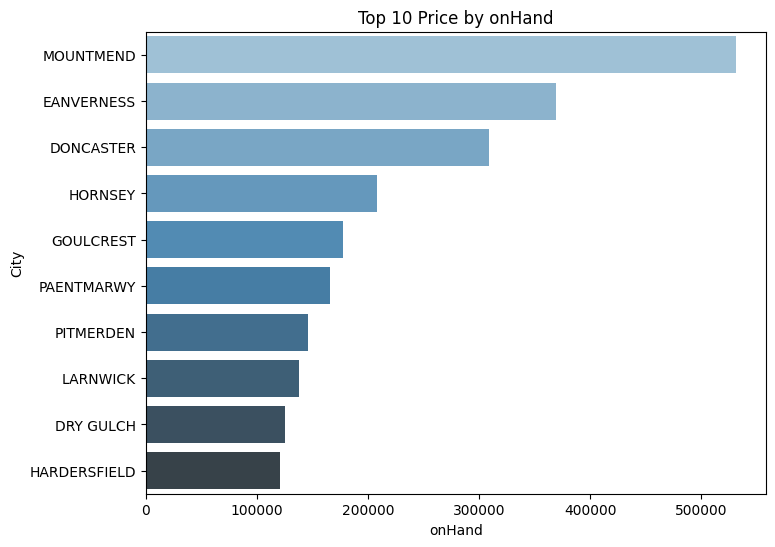

In [ ]:
plt.figure(figsize=(8,6))
top_suppliers = df.groupby('City')['onHand'].sum().nlargest(10)
sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='Blues_d')
plt.xlabel('City')
plt.ylabel('onHand')
plt.title('Top 10 City by onHand')
plt.show()

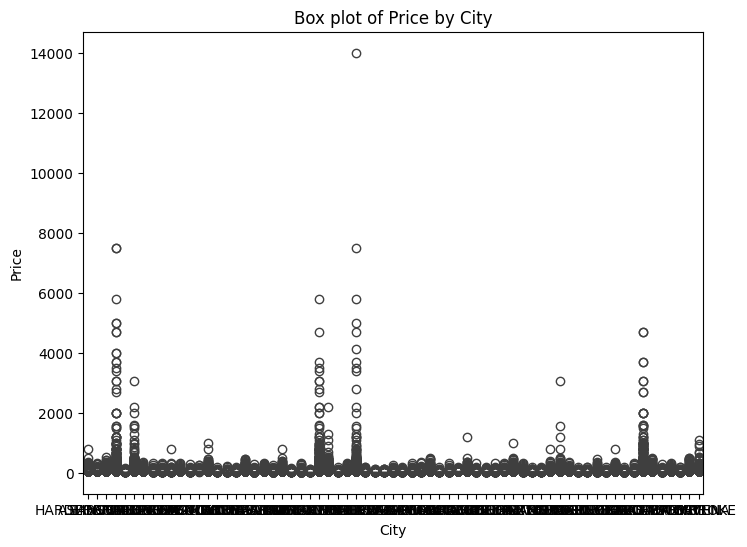

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='City', y='Price')
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Box plot of Price by City')
plt.show()

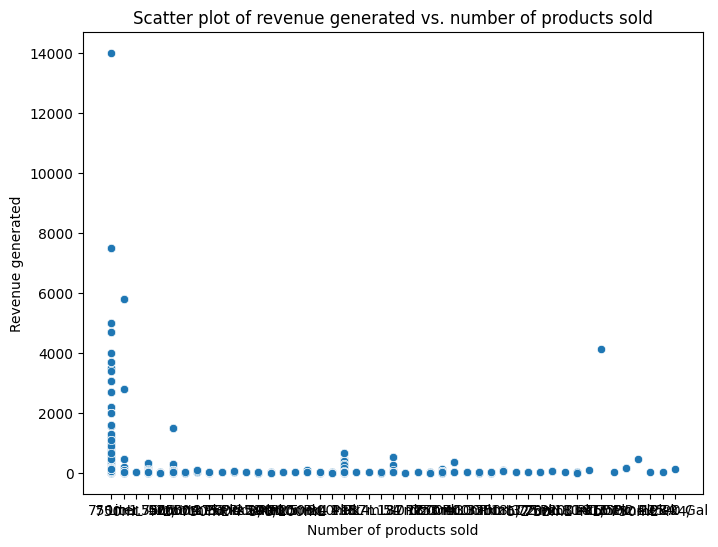

In [ ]:
# ¿Qué relación hay entre el Número de productos vendidos y los ingresos generados?
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Size', y='Price')
plt.xlabel('Number of products sold')
plt.ylabel('Revenue generated')
plt.title('Scatter plot of revenue generated vs. number of products sold')
plt.show()

In [ ]:
city_revenue = df.groupby('Description')['onHand'].sum()
city_revenue = city_revenue.sort_values(ascending=False)
city_revenue

,onHand
Description,
Capt Morgan Spiced Rum,34499
Jack Daniels No 7 Black,33385
Absolut 80 Proof,33289
Bacardi Superior Rum,29120
Baileys Irish Cream,28763
...,...
Luca Bosio Moscato d'Asti,0
Quattro Mani Montepulciano,0
A to Z Rsl,0


/tmp/ipython-input-822529683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_revenue[:10], y=city_revenue[:10].index, palette='Blues_r')


Text(0.5, 1.0, 'Top 10 City by Revenue')

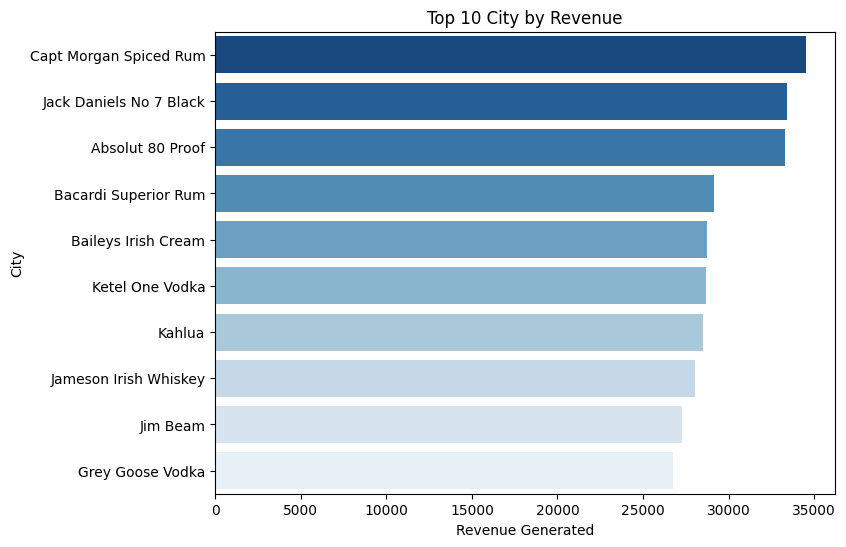

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=city_revenue[:10], y=city_revenue[:10].index, palette='Blues_r')
plt.xlabel('Revenue Generated')
plt.ylabel('Description')
plt.title('Top 10 Description by Revenue')

📊 KPI PRINCIPALES
- Total de productos únicos: 8732
- Total de marcas únicas: 9653
- Valor total del inventario: $79,704,851.13
- Precio promedio de productos: $23.59


/tmp/ipython-input-4005896972.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Description', data=df_top10_price, palette="viridis")


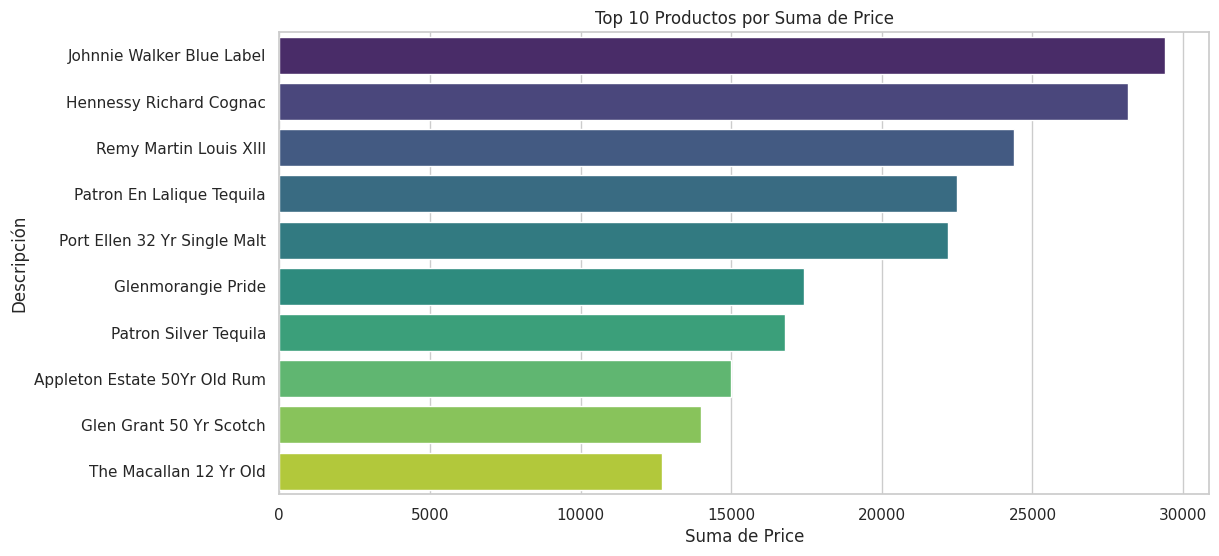

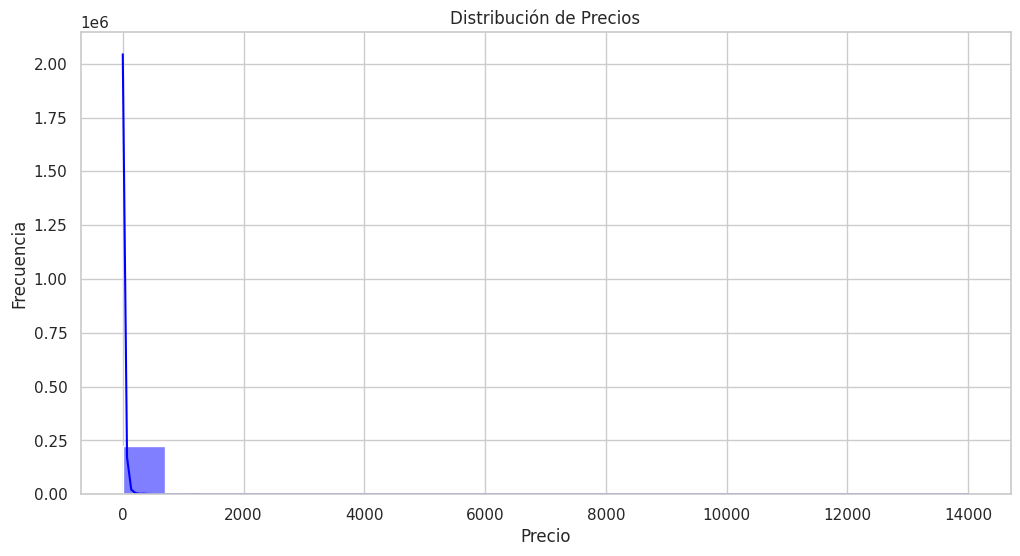

/tmp/ipython-input-4005896972.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='InventoryValue', y='City', data=df_city_value.sort_values('InventoryValue', ascending=False), palette="magma")


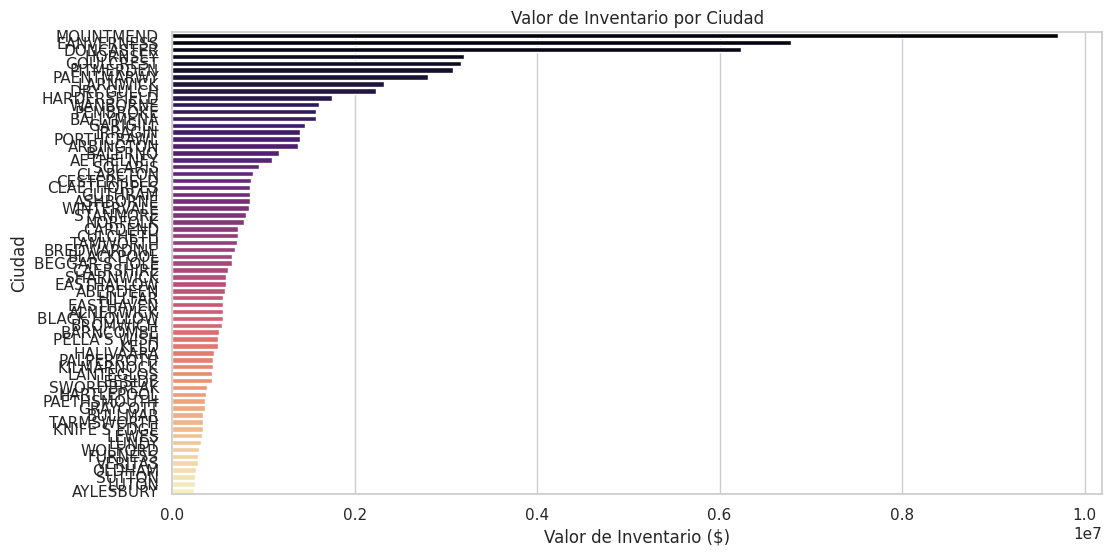

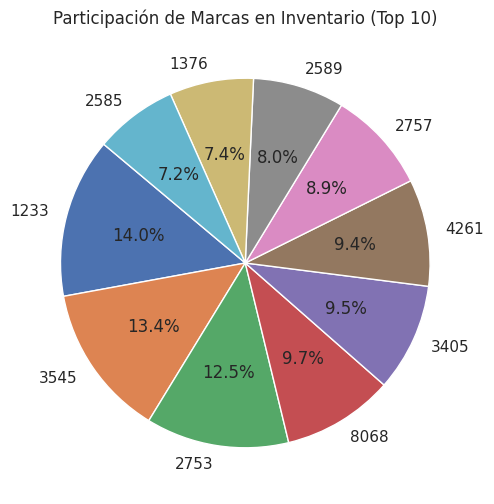

/tmp/ipython-input-4005896972.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='onHand', y='Description', data=df_top_stock, palette="coolwarm")


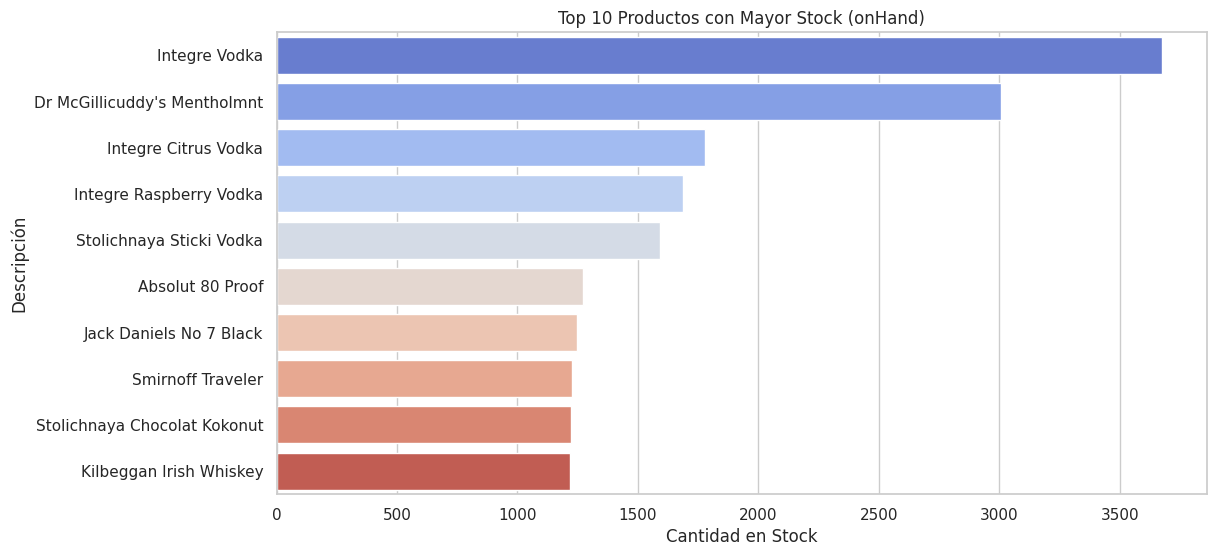

/tmp/ipython-input-4005896972.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='InventoryValue', y='Description', data=df_top_value, palette="crest")


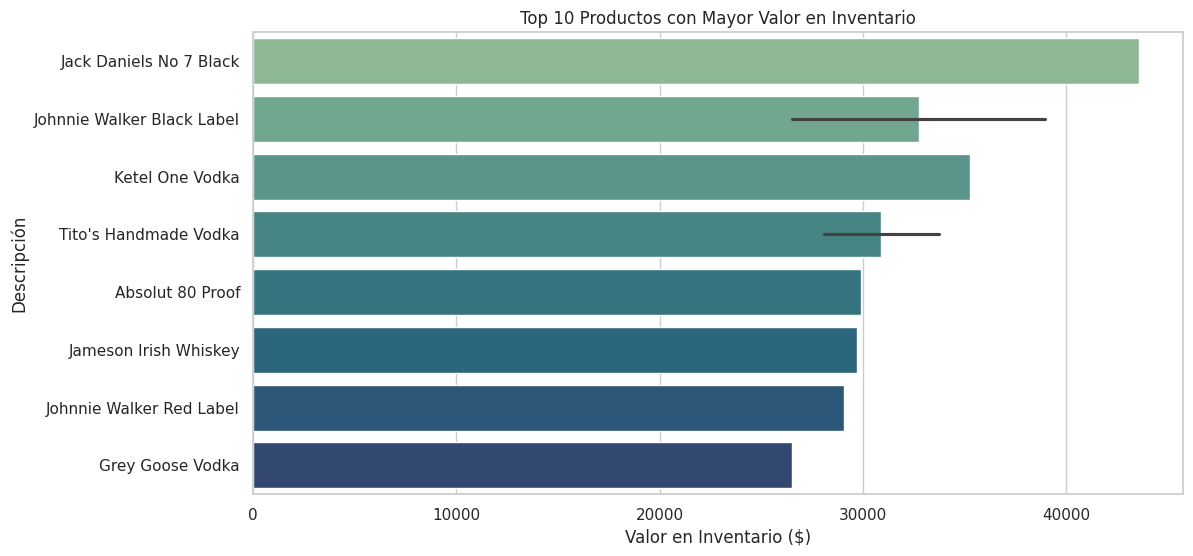

In [17]:
# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Crear columna de valor total del inventario
df['InventoryValue'] = df['Price'] * df['onHand']

# ==========================
# 1️⃣ KPI PRINCIPALES
# ==========================
print("📊 KPI PRINCIPALES")
print(f"- Total de productos únicos: {df['Description'].nunique()}")
print(f"- Total de marcas únicas: {df['Brand'].nunique()}")
print(f"- Valor total del inventario: ${df['InventoryValue'].sum():,.2f}")
print(f"- Precio promedio de productos: ${df['Price'].mean():.2f}")

# ==========================
# 2️⃣ TOP 10 POR SUMA DE PRICE
# ==========================
df_sum_price = df.groupby('Description', as_index=False)['Price'].sum()
df_top10_price = df_sum_price.sort_values(by='Price', ascending=False).head(10)

plt.figure()
sns.barplot(x='Price', y='Description', data=df_top10_price, palette="viridis")
plt.title("Top 10 Productos por Suma de Price")
plt.xlabel("Suma de Price")
plt.ylabel("Descripción")
plt.show()

# ==========================
# 3️⃣ DISTRIBUCIÓN DE PRECIOS
# ==========================
plt.figure()
sns.histplot(df['Price'], bins=20, kde=True, color="blue")
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

# ==========================
# 4️⃣ VALOR DE INVENTARIO POR CIUDAD
# ==========================
df_city_value = df.groupby('City', as_index=False)['InventoryValue'].sum()
plt.figure()
sns.barplot(x='InventoryValue', y='City', data=df_city_value.sort_values('InventoryValue', ascending=False), palette="magma")
plt.title("Valor de Inventario por Ciudad")
plt.xlabel("Valor de Inventario ($)")
plt.ylabel("Ciudad")
plt.show()

# ==========================
# 5️⃣ PARTICIPACIÓN DE MARCAS (TOP 10)
# ==========================
df_brand_value = df.groupby('Brand', as_index=False)['InventoryValue'].sum()
df_brand_top10 = df_brand_value.sort_values(by='InventoryValue', ascending=False).head(10)

plt.figure()
plt.pie(df_brand_top10['InventoryValue'], labels=df_brand_top10['Brand'], autopct='%1.1f%%', startangle=140)
plt.title("Participación de Marcas en Inventario (Top 10)")
plt.show()

# ==========================
# 6️⃣ PRODUCTOS CON MAYOR STOCK Y VALOR
# ==========================
df_top_stock = df.sort_values(by='onHand', ascending=False).head(10)
plt.figure()
sns.barplot(x='onHand', y='Description', data=df_top_stock, palette="coolwarm")
plt.title("Top 10 Productos con Mayor Stock (onHand)")
plt.xlabel("Cantidad en Stock")
plt.ylabel("Descripción")
plt.show()

df_top_value = df.sort_values(by='InventoryValue', ascending=False).head(10)
plt.figure()
sns.barplot(x='InventoryValue', y='Description', data=df_top_value, palette="crest")
plt.title("Top 10 Productos con Mayor Valor en Inventario")
plt.xlabel("Valor en Inventario ($)")
plt.ylabel("Descripción")
plt.show()

In [21]:
# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Cargar datos
df = pd.read_csv("EndInvFINAL12312016.csv")

# Crear columna de valor total de inventario
df['InventoryValue'] = df['Price'] * df['onHand']

# ==========================
# Función para generar dashboard por ciudad
# ==========================
def dashboard_ciudad(ciudad):
    clear_output(wait=True)

    # Filtrar por ciudad seleccionada
    df_city = df[df['City'] == ciudad]

    # KPIs básicos
    total_inventario = df_city['onHand'].sum()
    valor_inventario = df_city['InventoryValue'].sum()
    precio_promedio = df_city['Price'].mean()
    marcas_unicas = df_city['Brand'].nunique()
    productos_unicos = df_city['Description'].nunique()

    print(f"📍 Dashboard - Ciudad: {ciudad}")
    print(f"- Total inventario (onHand): {total_inventario:,}")
    print(f"- Valor total inventario: ${valor_inventario:,.2f}")
    print(f"- Precio promedio: ${precio_promedio:,.2f}")
    print(f"- Marcas únicas: {marcas_unicas}")
    print(f"- Productos únicos: {productos_unicos}")

    # ---- Top 10 productos por inventario ----
    df_top_prod = df_city.groupby('Description', as_index=False)['onHand'].sum().sort_values(by='onHand', ascending=False).head(10)
    plt.figure()
    sns.barplot(x='onHand', y='Description', data=df_top_prod, palette='coolwarm')
    plt.title(f"Top 10 Productos con Mayor Inventario en {ciudad}")
    plt.xlabel("Inventario (onHand)")
    plt.ylabel("Producto")
    plt.show()

    # ---- Top 10 marcas por valor ----
    df_top_brand = df_city.groupby('Brand', as_index=False)['InventoryValue'].sum().sort_values(by='InventoryValue', ascending=False).head(10)
    plt.figure()
    sns.barplot(x='InventoryValue', y='Brand', data=df_top_brand, palette='magma')
    plt.title(f"Top 10 Marcas por Valor en {ciudad}")
    plt.xlabel("Valor de Inventario ($)")
    plt.ylabel("Marca")
    plt.show()

    # ---- Distribución de precios ----
    plt.figure()
    sns.histplot(df_city['Price'], bins=20, kde=True, color='blue')
    plt.title(f"Distribución de Precios en {ciudad}")
    plt.xlabel("Precio")
    plt.ylabel("Frecuencia")
    plt.show()

    # ---- Comparativa con otras ciudades ----
    df_comparativa = df.groupby('City', as_index=False)['InventoryValue'].sum().sort_values(by='InventoryValue', ascending=False)
    plt.figure()
    sns.barplot(x='InventoryValue', y='City', data=df_comparativa, palette='viridis')
    plt.axhline(valor_inventario, color='red', linestyle='--', label=f"{ciudad} (${valor_inventario:,.0f})")
    plt.title("Comparación de Valor de Inventario entre Ciudades")
    plt.xlabel("Valor de Inventario ($)")
    plt.ylabel("Ciudad")
    plt.legend()
    plt.show()
